In [ ]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 9.1 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym
import numpy as np
import random
import time

# FrozenLake8x8-v1

# Q-learning

In [ ]:
env = gym.make('FrozenLake8x8-v1', render_mode="rgb_array")

In [ ]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# Hyperparameters
gamma = 0.9
learning_rate = 0.8
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.00005

num_episodes = 200000
num_steps_per_episode = 400 # Each environment can have a different episode length

In [ ]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [ ]:
import time
start=time.time()
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end=time.time()

Episode 199999 finished


In [ ]:
q_table

array([[2.64517053e-04, 2.63765848e-04, 2.50750085e-03, 2.57469673e-04],
       [3.53113174e-04, 2.50730525e-03, 7.56887814e-04, 3.52959325e-04],
       [1.78079550e-03, 1.16168740e-03, 2.19483815e-03, 5.95405731e-04],
       [3.26682785e-03, 1.10321236e-03, 1.06670044e-02, 1.19224873e-03],
       [1.95058449e-03, 9.65038378e-04, 4.54737266e-03, 1.62342867e-02],
       [1.88111759e-03, 3.41542398e-03, 6.63267270e-03, 6.44376083e-02],
       [7.20554596e-03, 9.02075537e-02, 6.90207690e-03, 6.88898873e-03],
       [1.39721180e-01, 3.84840050e-03, 6.12175764e-03, 6.04768436e-03],
       [7.66202667e-04, 3.50599309e-04, 6.54401467e-04, 1.59371073e-03],
       [2.96365203e-04, 1.53361652e-03, 2.91810728e-04, 2.32801438e-03],
       [7.33020147e-04, 6.18031332e-04, 4.90541749e-04, 4.55700193e-03],
       [1.54610726e-04, 9.08621467e-04, 1.50575818e-03, 3.72525690e-02],
       [7.42061857e-04, 8.04812475e-04, 1.26193792e-03, 2.74221809e-02],
       [2.25783767e-03, 2.32276822e-03, 1.70266718e

In [ ]:
print(f"Sum of rewards:{sum(rewards_all)}")
print(f"Time:{end-start}")

Sum of rewards:54051.0
Time:463.29317116737366


In [ ]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [ ]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(f"{state} --> {next_state}")
            time.sleep(0.5)
            # screen = env.render(mode='rgb_array')
            screen = env.render()
            plt.imshow(screen)
            ipythondisplay.clear_output(wait=True)
            ipythondisplay.display(plt.gcf())
            time.sleep(0.1)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

In [ ]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [ ]:
play_multiple_times(env, q_table, 1000)

Number of successes: 501/1000
Average number of steps: 88.85429141716567


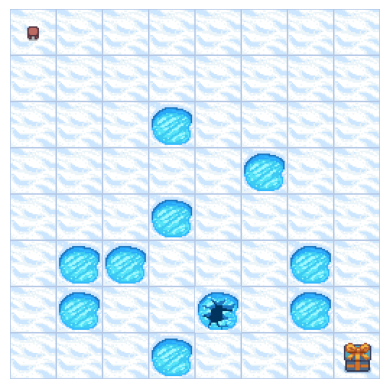

(0.0, 90)

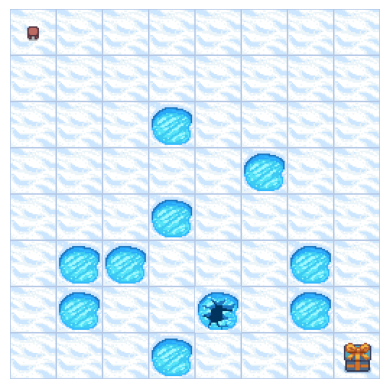

In [ ]:
play(env, q_table, render=True)

In [ ]:
rewards_all_q_learning=rewards_all

# Sarsa

In [ ]:
env = gym.make("FrozenLake8x8-v1", render_mode="rgb_array")

In [ ]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# Hyperparameters
gamma = 0.9
learning_rate = 0.8
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.00005

num_episodes = 200000
num_steps_per_episode = 400 # Each environment can have a different episode length

In [ ]:
'''
vì hàm np.argmax chọn ra phần tử lớn nhất xuất hiện đầu tiên trong mảng
nên khi khởi tạo q_table với tất các giá trị bằng nhau (=0) và agent thực hiện chọn hành động
nó luôn ưu tiên chọn hành động có value lớn nhất đầu tiên (vd luôn đi qua phải)
điều này gây mất công bằng với các với các hành động khác có cùng giá trị lớn nhất
code này cho hàm argmax công bằng hơn với tất cả các hành động có cùng giá trị lớn nhất
'''
def arg_max(l):
    res = []
    max_val = -1000
    for i in range(len(l)):
        if l[i] > max_val:
            max_val = l[i]
            res = [i]
        elif l[i] == max_val:
            res.append(i)
    return random.choice(res)

In [ ]:
def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        action = random.randint(0, env.action_space.n-1)
        next_state, reward, done, info, _ = env.step(action)

        reward_episode = reward
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            if done:
                q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward)
                break

            exploration = random.uniform(0,1)
            if exploration < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = arg_max(q_table[next_state, :])

            next_next_state, next_reward, done, info, _ = env.step(next_action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[next_state, next_action])

            reward_episode += next_reward
            state = next_state
            action = next_action
            reward = next_reward
            next_state = next_next_state

        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [ ]:
start=time.time()
q_table, rewards_all = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end=time.time()

Episode 199999 finished


In [ ]:
q_table

array([[5.08870894e-04, 5.92807232e-04, 9.41979323e-04, 4.89525861e-04],
       [1.50905035e-04, 2.41257500e-04, 1.51672198e-04, 3.01271300e-03],
       [2.28221734e-04, 4.53818218e-04, 1.98737076e-03, 2.31407798e-04],
       [4.55458897e-04, 5.64378855e-04, 4.19794604e-04, 3.53954748e-03],
       [1.36459477e-03, 2.34202893e-03, 8.07791781e-03, 8.96584954e-04],
       [1.43013249e-03, 1.32910223e-03, 5.78429776e-03, 2.11676754e-03],
       [8.76547460e-03, 1.46532925e-03, 3.55576865e-03, 5.63931062e-03],
       [1.69022349e-03, 1.43461365e-02, 1.76346225e-03, 3.22215204e-03],
       [2.40947980e-04, 2.34643704e-04, 2.99886249e-04, 5.14151557e-04],
       [1.49126565e-04, 1.50503162e-04, 1.17925494e-03, 1.55078728e-04],
       [1.46695771e-04, 1.86571820e-04, 1.10464969e-04, 1.27941742e-03],
       [5.54246786e-07, 3.58388013e-04, 8.88710573e-05, 4.37971799e-03],
       [5.88679566e-04, 5.75074562e-04, 4.94898999e-03, 2.21001245e-03],
       [9.40353807e-04, 1.24208008e-03, 1.17372469e

In [ ]:
print(f"Sum of rewards:{sum(rewards_all)}")
print(f"Time:{end-start}")

Sum of rewards:53029.0
Time:396.8808877468109


In [ ]:
play_multiple_times(env, q_table, 1000)

Number of successes: 587/1000
Average number of steps: 81.01362862010221


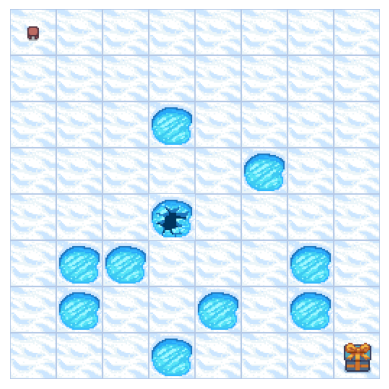

(0.0, 59)

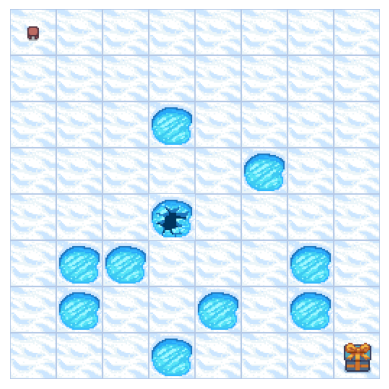

In [ ]:
play(env, q_table, render=True)

# So sánh Q-learning và Sarsa

In [ ]:
rewards_all_sarsa=rewards_all

In [ ]:
window = 100
average_y_q_learning, average_y_sarsa = [],[]
for ind in range(len(rewards_all_q_learning) - window + 1):
    average_y_q_learning.append(np.mean(rewards_all_q_learning[ind:ind+window]))
    average_y_sarsa.append(np.mean(rewards_all_sarsa[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y_q_learning.insert(0, np.nan)
    average_y_sarsa.insert(0, np.nan)

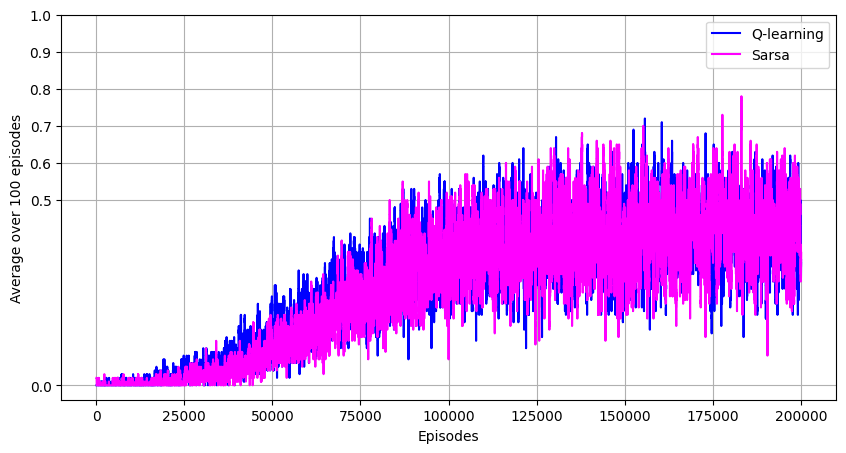

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_q_learning)), average_y_q_learning, color='blue', label='Q-learning')
plt.plot(np.arange(len(rewards_all_sarsa)), average_y_sarsa, color='magenta', label='Sarsa')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

Nhận xét:

**Tốc Độ Hội Tụ:**

Cả hai thuật toán đều cho thấy sự gia tăng dần dần về hiệu suất qua các tập.

**Hiệu Suất Cuối Cùng:**
Ở giai đoạn đầu của quá trình huấn luyện(khoảng 50,000 tập), mức trung bình của Sarsa cao hơn Q-learning.
Ở giai đoạn cuối của quá trình huấn luyện (sau khoảng 150,000 tập), cả hai thuật toán đều có mức độ biến động cao, nhưng mức trung bình của SARSA vẫn thấp hơn một chút so với Q-Learning.

**Sự Ổn Định:**

SARSA cho thấy sự ổn định tốt hơn trong suốt quá trình huấn luyện. Mặc dù có những biến động, nhưng chúng không quá lớn so với Q-Learning, đặc biệt ở các tập cuối.
Q-Learning có nhiều biến động lớn, làm cho đường biểu đồ có vẻ ít mượt mà hơn so với SARSA. Điều này có thể dẫn đến việc Q-Learning gặp khó khăn hơn trong việc duy trì hiệu suất cao ổn định.

**Thời gian chạy**:
- Thời gian chạy của SARSA (396.8808877468109s) nhanh hơn so với Q-Learning (463.29317116737366s)

- Q-Learning có tổng phần thưởng lớn hơn SARSA.

**Kết luận:**

SARSA có vẻ là lựa chọn tốt hơn trong môi trường FrozenLake8x8-v1 khi xét về tốc độ hội tụ và sự ổn định trong quá trình huấn luyện.
Q-Learning cũng đạt được hiệu suất tốt, nhưng có mức độ biến động cao hơn, và có thể cần nhiều tập hơn để đạt được mức hiệu suất tương tự như SARSA.

# FrozenLake-v1

In [ ]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")
env.reset()

(0, {'prob': 1})

# Q-learning

In [ ]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# Hyperparameters
gamma = 0.9
learning_rate = 0.8
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.00005

num_episodes = 200000
num_steps_per_episode = 400 # Each environment can have a different episode length

In [ ]:
import time
start_time=time.time()
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time=time.time()

Episode 199999 finished


In [ ]:
q_table

array([[1.77067875e-02, 8.45540899e-04, 1.17873007e-03, 6.54353356e-03],
       [4.08863135e-04, 3.87390032e-04, 3.07561220e-04, 7.43048568e-02],
       [4.25457339e-04, 2.84051983e-02, 8.30638113e-03, 7.27983760e-04],
       [2.25115853e-04, 3.82181127e-04, 3.15139373e-04, 1.04129507e-02],
       [3.75503325e-02, 2.09409951e-03, 1.59055818e-03, 6.71118416e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.23701257e-03, 6.23764873e-06, 4.98646457e-06, 2.52381955e-09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.11057684e-03, 4.23659659e-02, 1.03832487e-03, 5.29781435e-02],
       [1.48995384e-03, 5.67685392e-02, 4.48960914e-04, 1.65434882e-03],
       [3.07554813e-01, 1.33332420e-03, 1.03716963e-03, 1.28578260e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.68188197e-03, 4.11146172e-02, 1.73222646e

In [ ]:
print(f"Time for Q-learning:{end_time-start_time}")
print(f"Sum of rewards for Q-learning:{sum(rewards_all)}")

Time for Q-learning:159.1347141265869
Sum of rewards for Q-learning:60631.0


In [ ]:
play_multiple_times(env, q_table, 1000)

Number of successes: 746/1000
Average number of steps: 36.76407506702413


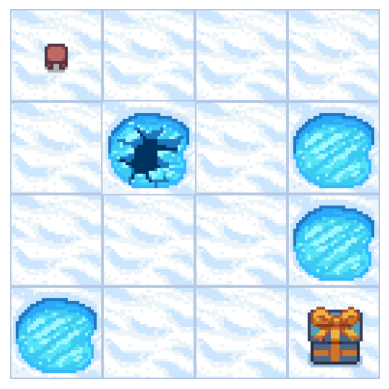

(0.0, 53)

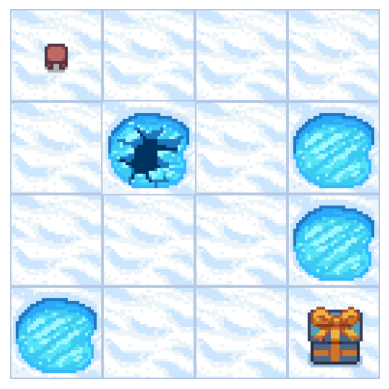

In [ ]:
play(env, q_table, render=True)

In [ ]:
rewards_all_q_learning=rewards_all

# Sarsa

In [ ]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")
env.reset()

(0, {'prob': 1})

In [ ]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# Hyperparameters
gamma = 0.9
learning_rate = 0.8
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.00005

num_episodes = 200000
num_steps_per_episode = 400 # Each environment can have a different episode length

In [ ]:
import time
start_time=time.time()
q_table, rewards_all = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time=time.time()

Episode 199999 finished


In [ ]:
q_table

array([[3.13254783e-02, 2.90639776e-02, 3.05833971e-02, 1.12517704e-01],
       [3.93223080e-04, 4.40614321e-03, 1.85478515e-03, 6.47910430e-02],
       [3.59590660e-02, 4.89875809e-04, 2.15899328e-03, 9.13201908e-04],
       [8.66849922e-04, 5.85458145e-04, 3.58376037e-05, 2.67973672e-03],
       [3.12190475e-02, 3.81641071e-03, 7.12565241e-03, 1.72272168e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.80704780e-05, 2.02937888e-11, 7.71963177e-03, 1.38355585e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.06450812e-02, 1.41673738e-02, 1.22261055e-04, 2.67921768e-02],
       [2.93172290e-02, 3.19971198e-01, 2.46978889e-02, 3.71543155e-02],
       [1.77533833e-01, 4.87633973e-03, 4.43888770e-03, 1.34558928e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.05037162e-02, 4.17641811e-03, 2.42471485e

In [ ]:
print("Sum of rewards for Sarsa: ", sum(rewards_all))
print("Time for Sarsa: ", end_time-start_time)

Sum of rewards for Sarsa:  55049.0
Time for Sarsa:  130.26350021362305


In [ ]:
play_multiple_times(env, q_table, 1000)

Number of successes: 238/1000
Average number of steps: 33.529411764705884


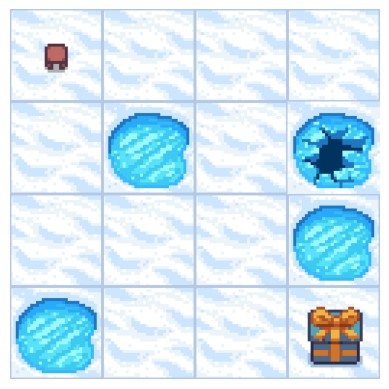

(0.0, 41)

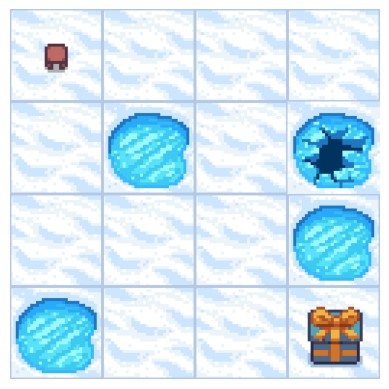

In [ ]:
play(env, q_table, render=True)

In [ ]:
rewards_all_sarsa=rewards_all

# So sánh Q-learning và Sarsa

In [ ]:
window = 100
average_y_q_learning, average_y_sarsa = [],[]
for ind in range(len(rewards_all_q_learning) - window + 1):
    average_y_q_learning.append(np.mean(rewards_all_q_learning[ind:ind+window]))
    average_y_sarsa.append(np.mean(rewards_all_sarsa[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y_q_learning.insert(0, np.nan)
    average_y_sarsa.insert(0, np.nan)

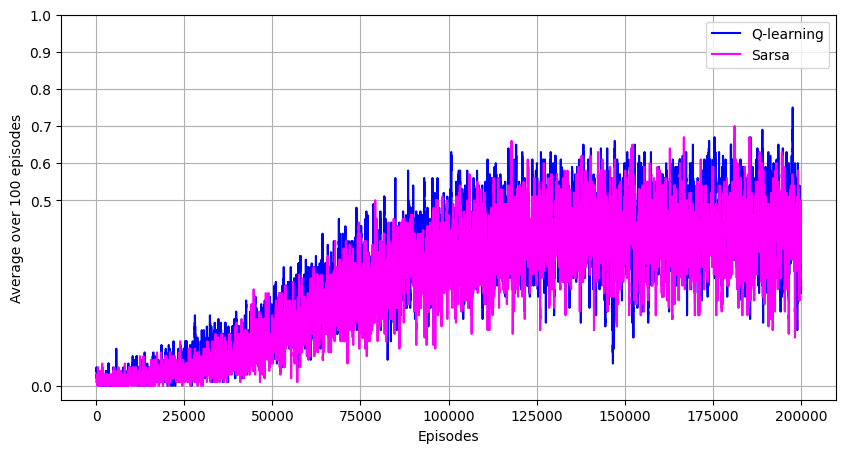

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_q_learning)), average_y_q_learning, color='blue', label='Q-learning')
plt.plot(np.arange(len(rewards_all_sarsa)), average_y_sarsa, color='magenta', label='Sarsa')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

Nhận xét

**Tốc Độ Hội Tụ:**

Tốc độ hội tụ của Q-Learning khá nhanh. Trong khoảng 60,000 tập đầu tiên, Q-Learning đã đạt mức trung bình khoảng 0.4.

SARSA có tốc độ hội tụ chậm hơn một chút so với Q-Learning. Để đạt được mức trung bình khoảng 0.4, SARSA cần nhiều hơn khoảng 70,000 tập.

**Hiệu Suất Cuối Cùng:**

Hiệu suất cuối cùng của Q-Learning dao động trong khoảng từ 0.5 đến 0.7. Q-Learning có thể đạt được hiệu suất cao hơn so với SARSA ở một vài đỉnh, nhưng cũng có nhiều biến động.

Hiệu suất cuối cùng của SARSA dao động trong khoảng từ 0.4 đến 0.6. Mức trung bình của SARSA có vẻ thấp hơn Q-Learning, nhưng sự biến động lớn hơn làm cho SARSA khó duy trì mức hiệu suất cao hơn.

**Sự Ổn Định:**

Q-Learning cho thấy sự ổn định tốt hơn trong các giai đoạn sau của quá trình huấn luyện. Mặc dù có biến động, nhưng mức trung bình không dao động quá nhiều và duy trì ở khoảng 0.6 đến 0.7.

SARSA có nhiều biến động hơn so với Q-Learning trong suốt quá trình huấn luyện. Mặc dù đạt được hiệu suất tương đối tốt, nhưng sự dao động lớn làm giảm tính ổn định của SARSA.


**Thời gian chạy**:
- Thời gian chạy của SARSA (130.26350021362305s) nhanh hơn so với Q-Learning (159.1347141265869s)

- Q-Learning có số màn chơi win (trong 1000 lượt chơi) và tổng phần thưởng đều lớn hơn SARSA.

**Kết luận:**

Trong môi trường FrozenLake-v1, SARSA có vẻ là lựa chọn tốt hơn Q-Learning nếu ưu tiên thời gian chạy. Tuy nhiên, nếu mục tiêu chỉ là đạt được hiệu suất cao mà không quá quan tâm đến mức độ biến động và thời gian chạy, thì cả hai thuật toán đều có thể được sử dụng.

# Taxi-v3

# Q-learning

In [ ]:
env = gym.make('Taxi-v3', render_mode="rgb_array")

In [ ]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
# Hyperparameters
gamma = 0.9
learning_rate = 0.8
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.00005

num_episodes = 200000
num_steps_per_episode = 400 # Each environment can have a different episode length

In [ ]:
start_time=time.time()
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time=time.time()

Episode 199999 finished


In [ ]:
q_table

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.58568212,  0.4603532 , -0.58568212,  0.4603532 ,  1.62261467,
        -8.5396468 ],
       [ 4.348907  ,  5.94323   ,  4.348907  ,  5.94323   ,  7.7147    ,
        -3.05677   ],
       ...,
       [ 7.7147    ,  9.683     ,  7.7147    ,  5.94323   , -1.2853    ,
        -1.2853    ],
       [ 1.62261467,  2.9140163 ,  1.62261467,  2.9140163 , -7.37738533,
        -7.37738533],
       [14.3       , 11.87      , 14.3       , 17.        ,  5.3       ,
         5.3       ]])

In [ ]:
print(f"Sum of rewards for Q-learning:{sum(rewards_all)}")
print(f"Time for Q-learning:{end_time-start_time}")

Sum of rewards for Q-learning:-2748964.0
Time for Q-learning:168.09248566627502


In [ ]:
play_multiple_times(env, q_table, 1000)

Number of successes: 1000/1000
Average number of steps: 13.094


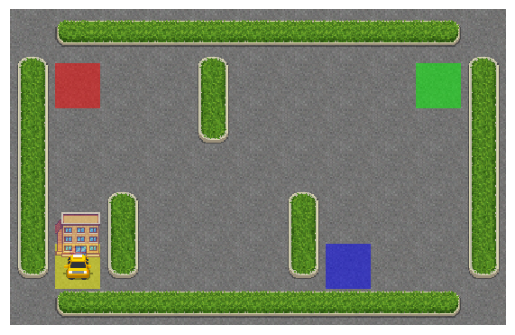

(9, 12)

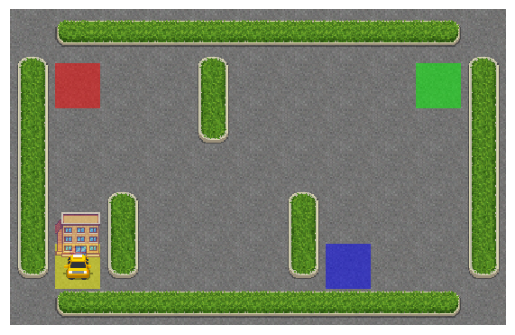

In [ ]:
play(env, q_table, render=True)

In [ ]:
rewards_all_q_learning=rewards_all

# Sarsa

In [ ]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
# Hyperparameters
gamma = 0.9
learning_rate = 0.8
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.00005

num_episodes = 200000
num_steps_per_episode = 400 # Each environment can have a different episode length

In [ ]:
start_time=time.time()
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)
end_time=time.time()

Episode 199999 finished


In [ ]:
q_table

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.58568212,  0.4603532 , -0.58568212,  0.4603532 ,  1.62261467,
        -8.5396468 ],
       [ 4.348907  ,  5.94323   ,  4.348907  ,  5.94323   ,  7.7147    ,
        -3.05677   ],
       ...,
       [ 7.7147    ,  9.683     ,  7.7147    ,  5.94323   , -1.2853    ,
        -1.2853    ],
       [ 1.62261467,  2.9140163 ,  1.62261467,  2.9140163 , -7.37738533,
        -7.37738533],
       [14.3       , 11.87      , 14.3       , 17.        ,  5.3       ,
         5.3       ]])

In [ ]:
print(f"Sum of rewards for Sarsa:{sum(rewards_all)}")
print(f"Time for Sarsa:{end_time-start_time}")

Sum of rewards for Sarsa:-2745859.0
Time for Sarsa:166.09468913078308


In [ ]:
play_multiple_times(env, q_table, 1000)

Number of successes: 1000/1000
Average number of steps: 13.095


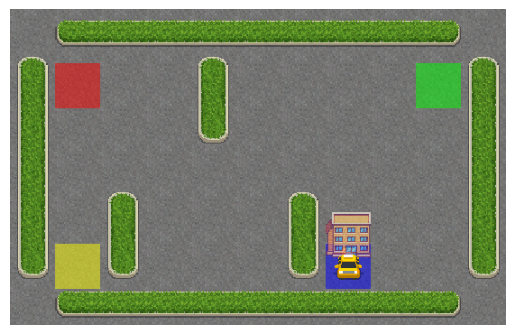

(9, 12)

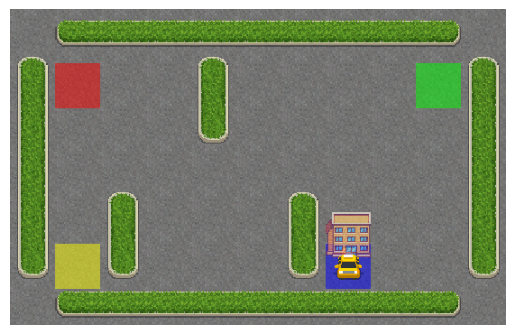

In [ ]:
play(env, q_table, render=True)

# So sánh Q-learning và Sarsa

In [ ]:
rewards_all_sarsa=rewards_all

In [ ]:
window = 100
average_y_q_learning, average_y_sarsa = [],[]
for ind in range(len(rewards_all_q_learning) - window + 1):
    average_y_q_learning.append(np.mean(rewards_all_q_learning[ind:ind+window]))
    average_y_sarsa.append(np.mean(rewards_all_sarsa[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y_q_learning.insert(0, np.nan)
    average_y_sarsa.insert(0, np.nan)

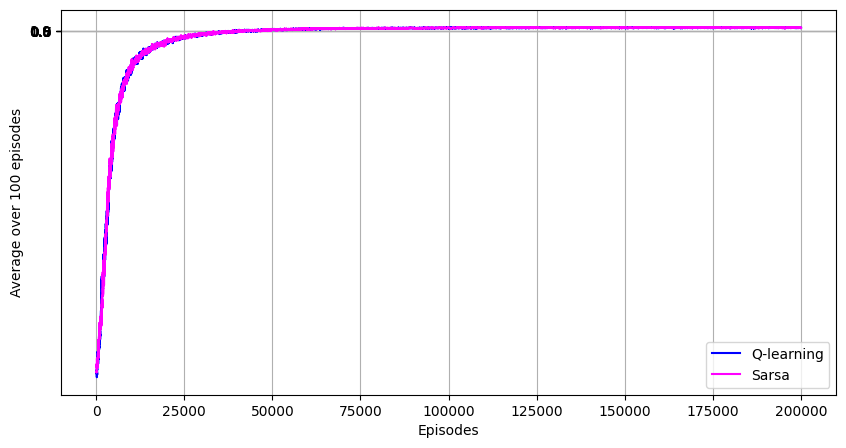

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all_q_learning)), average_y_q_learning, color='blue', label='Q-learning')
plt.plot(np.arange(len(rewards_all_sarsa)), average_y_sarsa, color='magenta', label='Sarsa')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

Nhận xét:

**Tốc Độ Hội Tụ:**

Tốc độ hội tụ của Q-Learning rất nhanh. Trong khoảng 2000 tập đầu tiên, Q-Learning đã đạt mức trung bình khoảng 0.6.

SARSA cũng có tốc độ hội tụ tương tự với Q-Learning. Cả hai thuật toán đều đạt mức trung bình khoảng 0.6 trong khoảng 2000 tập đầu tiên.

**Hiệu Suất Cuối Cùng:**

Hiệu suất cuối cùng của Q-Learning duy trì ổn định ở mức trung bình khoảng 0.6 trong suốt quá trình huấn luyện sau khi hội tụ.

Hiệu suất cuối cùng của SARSA cũng duy trì ổn định ở mức trung bình khoảng 0.6 tương tự như Q-Learning.

**Sự Ổn Định:**

Biểu đồ của Q-Learning cho thấy sự ổn định rất cao sau khi đạt được hiệu suất tối ưu. Sau khoảng 2000 tập, hiệu suất của Q-Learning gần như không dao động.

SARSA cũng cho thấy sự ổn định tương đương với Q-Learning. Sau khi đạt được hiệu suất tối ưu, hiệu suất của SARSA cũng gần như không dao động.

**So Sánh Chi Tiết:**

Trong giai đoạn hội tụ ban đầu, Q-Learning và SARSA đều có những thời điểm vượt trội hơn nhau, nhưng sự khác biệt không đáng kể. Cả hai thuật toán đều có những đỉnh và đáy gần như giống nhau.
Khi nhìn vào toàn bộ quá trình huấn luyện, không có sự khác biệt lớn giữa hai thuật toán về hiệu suất cuối cùng hoặc độ ổn định. Điều này cho thấy rằng trong môi trường Taxi-v3, cả Q-Learning và SARSA đều có thể đạt được kết quả tương đương nhau.

**Thời gian chạy**:
- Thời gian chạy của SARSA (166.09468913078308s) nhanh hơn so với Q-Learning (168.09248566627502s)

- Q-Learning có số màn chơi win (trong 1000 lượt chơi) bằng với SARSA và đều bằng 1000.

**Kết luận:**

Cả Q-Learning và SARSA đều thể hiện hiệu suất rất tốt và tương đương nhau trong môi trường Taxi-v3. Cả hai đều hội tụ nhanh chóng và duy trì được mức độ ổn định cao sau khi hội tụ.
Không có sự khác biệt đáng kể giữa hai thuật toán về tốc độ hội tụ, hiệu suất cuối cùng, hoặc sự ổn định trong môi trường này.